In [1]:
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py'

--2022-11-09 02:15:22--  https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5823 (5.7K) [text/plain]
Saving to: ‘dcgan.py’

dcgan.py            100%[===================>]   5.69K  --.-KB/s    in 0s      

2022-11-09 02:15:22 (82.0 MB/s) - ‘dcgan.py’ saved [5823/5823]



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

from dcgan import DCGAN

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [2]:
# load MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = np.expand_dims(X_train, -1)

Look at a sample of the original images

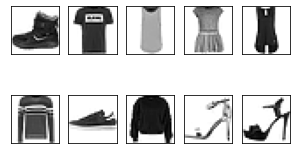

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    img = img.reshape(28, 28)
    i, j = indx // 5, indx % 5
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

Epoch 1: 100%|##########| 600/600 [05:47<00:00,  1.73it/s]


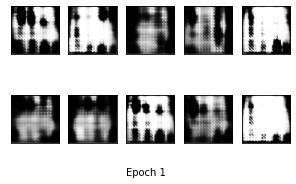

Epoch 2: 100%|##########| 600/600 [05:40<00:00,  1.76it/s]


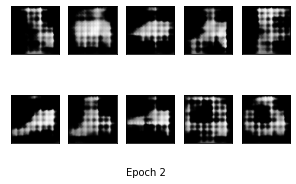

Epoch 3: 100%|##########| 600/600 [05:36<00:00,  1.78it/s]


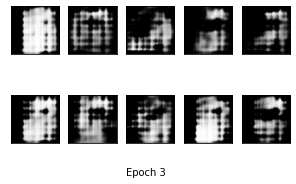

Epoch 4: 100%|##########| 600/600 [05:34<00:00,  1.79it/s]


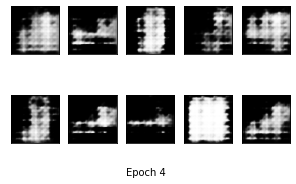

Epoch 5: 100%|##########| 600/600 [05:38<00:00,  1.77it/s]


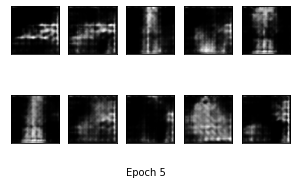

Epoch 6: 100%|##########| 600/600 [05:39<00:00,  1.77it/s]


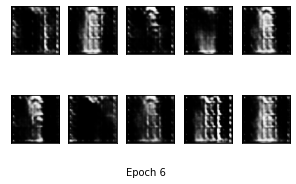

Epoch 7: 100%|##########| 600/600 [05:37<00:00,  1.78it/s]


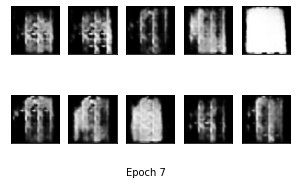

Epoch 8: 100%|##########| 600/600 [05:38<00:00,  1.77it/s]


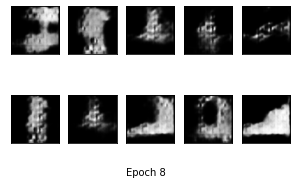

Epoch 9: 100%|##########| 600/600 [05:35<00:00,  1.79it/s]


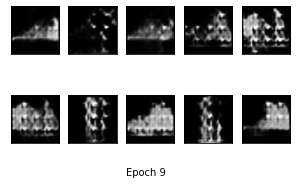

Epoch 10: 100%|##########| 600/600 [05:36<00:00,  1.78it/s]


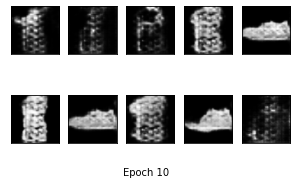

Epoch 11: 100%|##########| 600/600 [05:35<00:00,  1.79it/s]


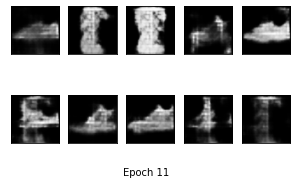

Epoch 12: 100%|##########| 600/600 [05:38<00:00,  1.77it/s]


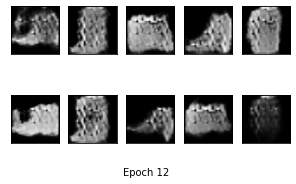

Epoch 13: 100%|##########| 600/600 [05:36<00:00,  1.78it/s]


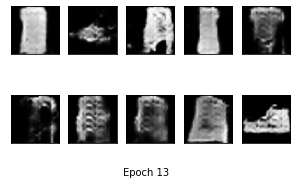

Epoch 14: 100%|##########| 600/600 [05:38<00:00,  1.77it/s]


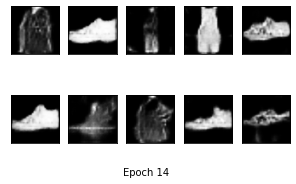

Epoch 15: 100%|##########| 600/600 [05:38<00:00,  1.77it/s]


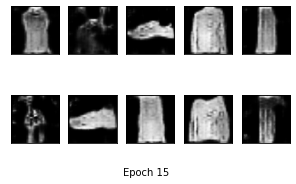

Epoch 16: 100%|##########| 600/600 [05:38<00:00,  1.78it/s]


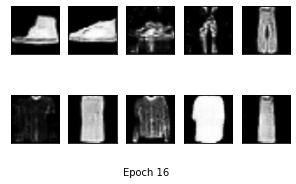

Epoch 17: 100%|##########| 600/600 [05:35<00:00,  1.79it/s]


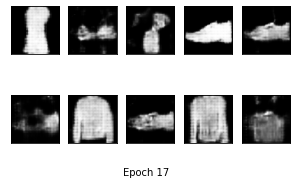

Epoch 18: 100%|##########| 600/600 [05:36<00:00,  1.78it/s]


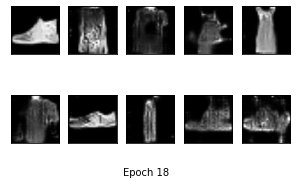

Epoch 19: 100%|##########| 600/600 [05:37<00:00,  1.78it/s]


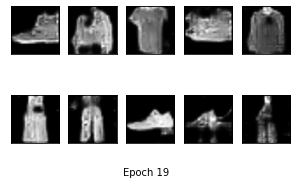

Epoch 20: 100%|##########| 600/600 [05:37<00:00,  1.78it/s]


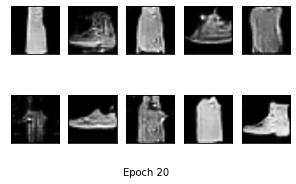

Epoch 21: 100%|##########| 600/600 [05:36<00:00,  1.78it/s]


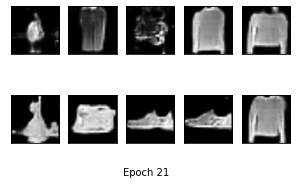

Epoch 22: 100%|##########| 600/600 [05:40<00:00,  1.76it/s]


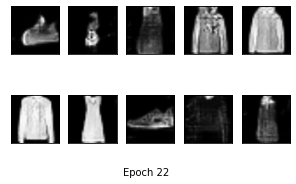

Epoch 23: 100%|##########| 600/600 [05:37<00:00,  1.78it/s]


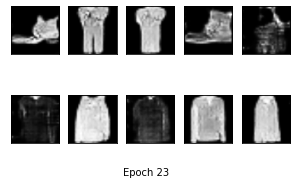

Epoch 24: 100%|##########| 600/600 [05:38<00:00,  1.77it/s]


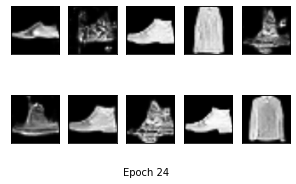

Epoch 25: 100%|##########| 600/600 [05:37<00:00,  1.78it/s]


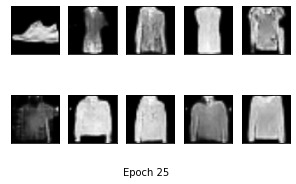

In [5]:
model_path = None
dcgan = DCGAN(model_path=model_path)

d_losses, g_losses = dcgan.train(X_train, 25, 100, verbose=1)

In [ ]:
dcgan.save_model('models')

Plot the losses during training. The generator and discriminator losses should converge.

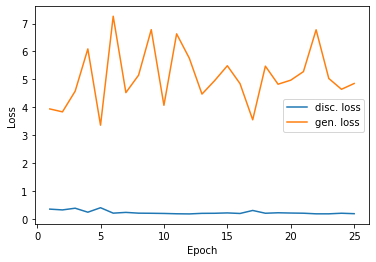

In [7]:
plt.plot(range(1, 26), d_losses, label='disc. loss')
plt.plot(range(1, 26), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()